<a href="https://colab.research.google.com/github/sharvanitamaskar/Fuel-Efficiency-Forecasting/blob/main/FuelEfficiencyForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')


In [ ]:
#print all the uploaded file names
print(uploaded.keys())

dict_keys(['auto-mpg.csv'])


In [ ]:
# Load the dataset file
df = pd.read_csv(io.BytesIO(uploaded['auto-mpg.csv']))
print(df)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

In [ ]:
df.shape


(398, 9)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df['horsepower'].unique()


array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
print(df.shape)
df = df[df['horsepower'] != '?']
print(df.shape)


(398, 9)
(392, 9)


In [ ]:
df['horsepower'] = df['horsepower'].astype(int)
df.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
df.nunique()


mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model year       13
origin            3
car name        301
dtype: int64

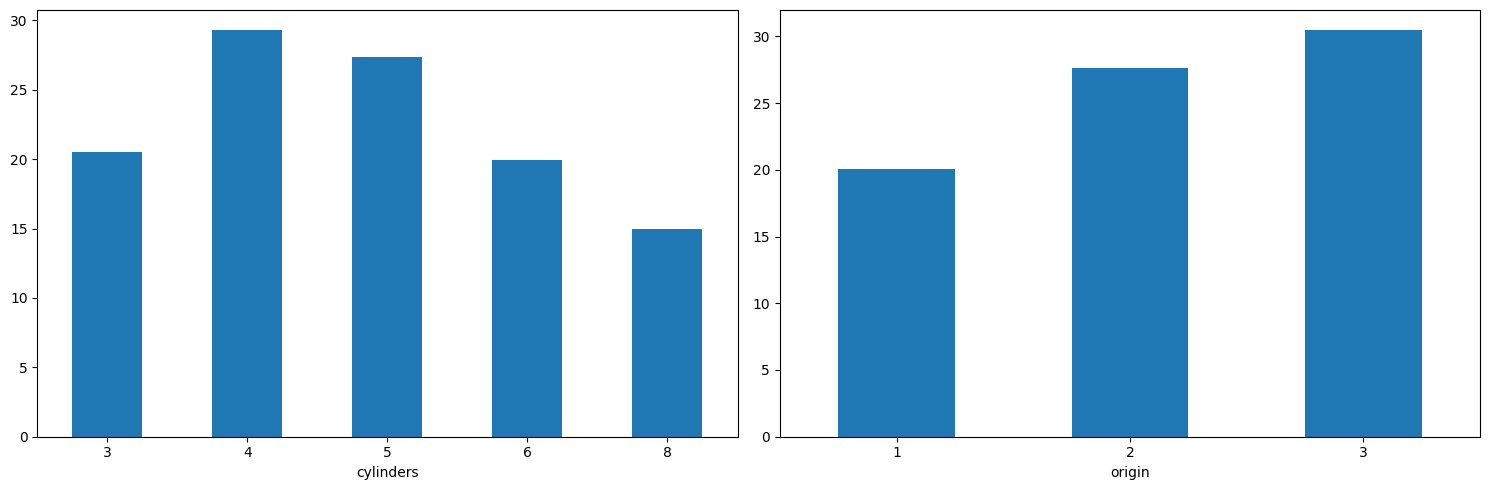

In [ ]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['cylinders', 'origin']):
	plt.subplot(1, 2, i+1)
	x = df.groupby(col).mean()['mpg']
	x.plot.bar()
	plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


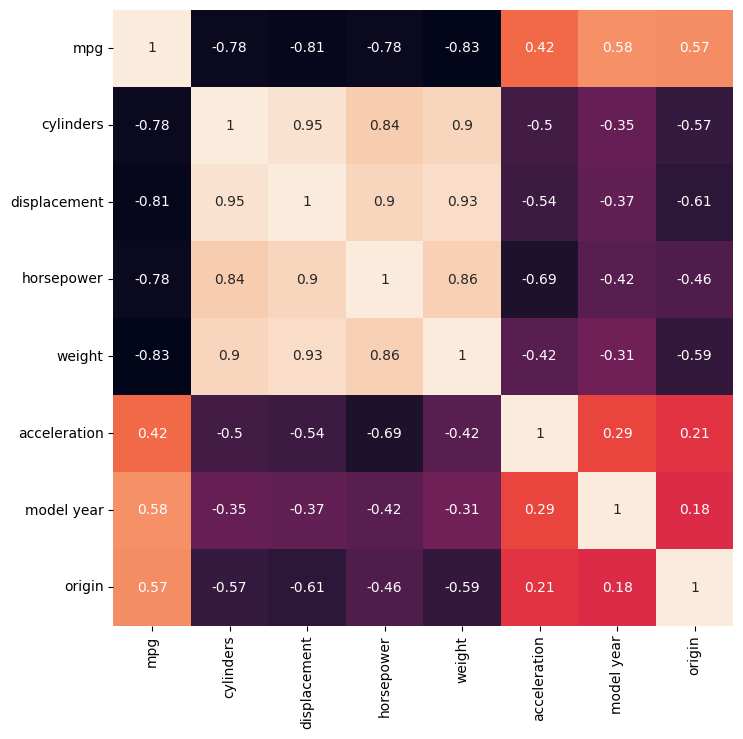

In [ ]:
plt.figure(figsize=(8, 8))
sb.heatmap(df.corr() ,
		annot=True,
		cbar=False)
plt.show()


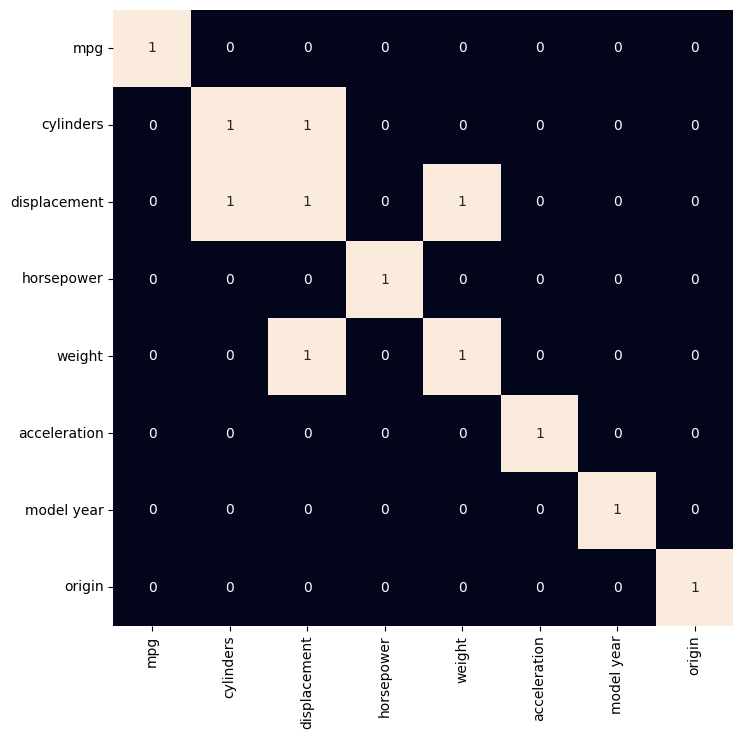

In [ ]:
plt.figure(figsize=(8, 8))
sb.heatmap(df.corr()>0.9 ,
		annot=True,
		cbar=False)
plt.show()

In [ ]:
df.drop('displacement',
		axis=1,
		inplace=True)



In [ ]:
from sklearn.model_selection import train_test_split

features = df.drop(['mpg', 'car name'], axis=1)
target = df['mpg'].values

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=22)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=22)

print(Y_train.shape)
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

(313,)
Training set shape: (313, 6)
Validation set shape: (39, 6)
Testing set shape: (40, 6)


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

lr = LinearRegression()

def mape_scorer(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

lr.fit(X_train, Y_train)

y_pred_train = lr.predict(X_train)

mape_lr_train = mape_scorer(Y_train, y_pred_train)
print('Mean Absolute Percentage Error (MAPE) on Train Set:', mape_lr_train)

y_pred_test = lr.predict(X_test)

mape_lr_test = mape_scorer(Y_test, y_pred_test)
print('Mean Absolute Percentage Error (MAPE) on Test Set:', mape_lr_test)

results_df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_test})

Mean Absolute Percentage Error (MAPE) on Train Set: 11.14358148153736
Mean Absolute Percentage Error (MAPE) on Test Set: 14.653457325740899


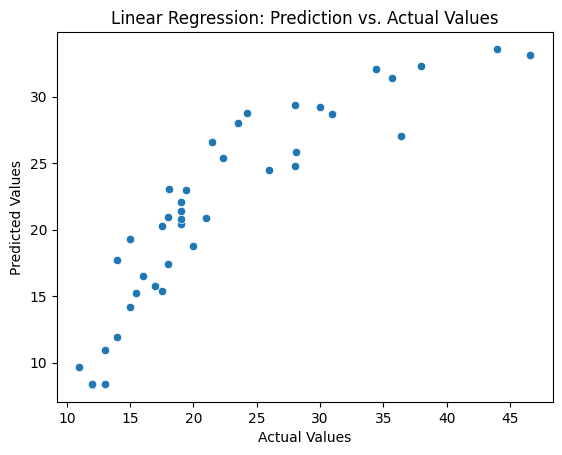

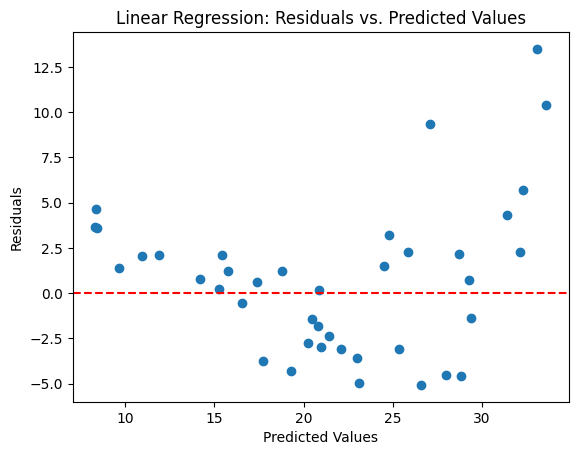

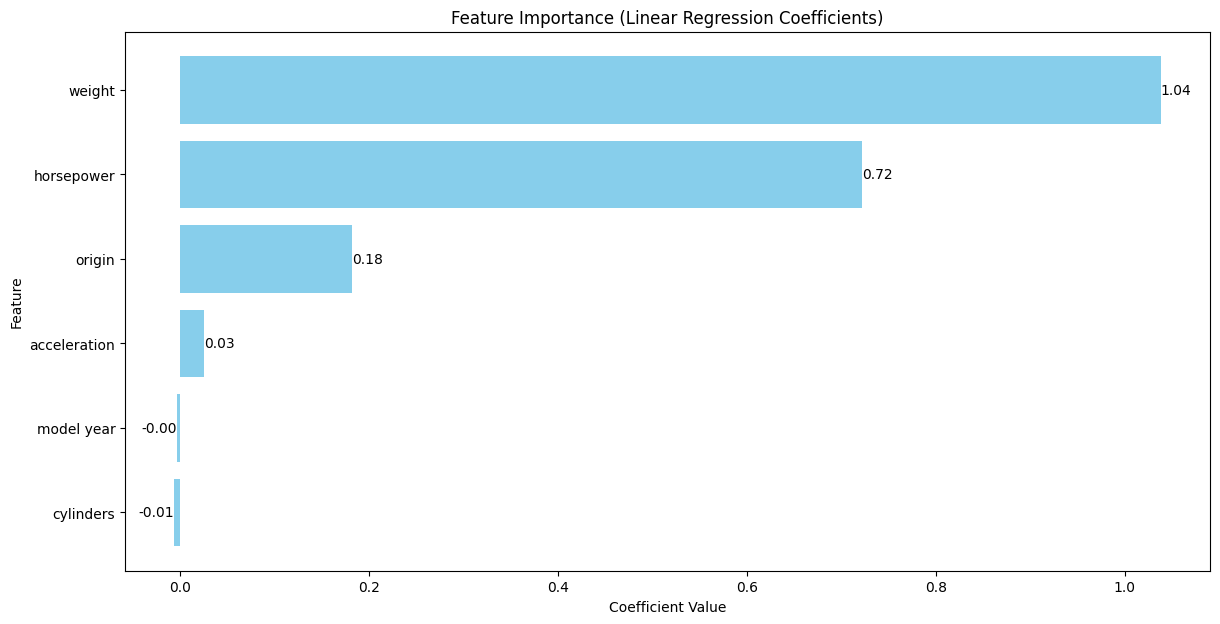

In [ ]:
sb.scatterplot(x='Actual', y='Predicted', data=results_df)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Prediction vs. Actual Values')
plt.show()

residuals = Y_test - y_pred_test
plt.scatter(y_pred_test, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals vs. Predicted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

coefficients = lr.coef_
features = ['origin', 'model year', 'cylinders', 'acceleration', 'horsepower', 'weight']
coeff_df = pd.DataFrame(coefficients, features, columns=['Coefficient'])
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=True)
plt.figure(figsize=(14, 7))
bars = plt.barh(coeff_df.index, coeff_df['Coefficient'], color='skyblue')
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}',
             ha='right' if width < 0 else 'left',
             va='center')

plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

features = df.drop(['mpg', 'car name'], axis=1)
target = df['mpg'].values

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=22)

X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=22)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

poly = PolynomialFeatures(degree=2)
features_poly = poly.fit_transform(features_scaled)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)
print("Dimensions of features_poly:", features_poly.shape)

ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)

lr_mape_cv = cross_val_score(ridge, features_poly, target, cv=5, scoring=make_scorer(mape_scorer))

print("Mean Absolute Percentage Error (MAPE) from Cross-Validation:", np.mean(lr_mape_cv))


Training set shape: (313, 6)
Validation set shape: (39, 6)
Testing set shape: (40, 6)
Dimensions of features_poly: (392, 28)
Mean Absolute Percentage Error (MAPE) from Cross-Validation: 9.42856000405884


In [ ]:
X_train.shape

(313, 6)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
y_train_pred = rf.predict(X_train)
mape_train = np.mean(np.abs((Y_train - y_train_pred) / Y_train)) * 100
print(f'Train Mean Absolute Percentage Error (MAPE): {mape_train}%')
y_val_pred = rf.predict(X_val)
mape_val = np.mean(np.abs((Y_val - y_val_pred) / Y_val)) * 100
print(f'Validation Mean Absolute Percentage Error (MAPE): {mape_val}%')
y_test_pred = rf.predict(X_test)
mape_test = np.mean(np.abs((Y_test - y_test_pred) / Y_test)) * 100
print(f'Test Mean Absolute Percentage Error (MAPE): {mape_test}%')

Train Mean Absolute Percentage Error (MAPE): 3.208931713215106%
Validation Mean Absolute Percentage Error (MAPE): 10.071564165309912%
Test Mean Absolute Percentage Error (MAPE): 8.117680436521358%


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, Y_train)
print(rf_random.best_params_)
y_val_pred = rf_random.predict(X_val)
mape_val = np.mean(np.abs((Y_val - y_val_pred) / Y_val)) * 100
print(f'Validation Mean Absolute Percentage Error (MAPE): {mape_val}%')
y_test_pred = rf_random.predict(X_test)
mape_test = np.mean(np.abs((Y_test - y_test_pred) / Y_test)) * 100
print(f'Test Mean Absolute Percentage Error (MAPE): {mape_test}%')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Validation Mean Absolute Percentage Error (MAPE): 10.003547721560485%
Test Mean Absolute Percentage Error (MAPE): 7.985834460149961%


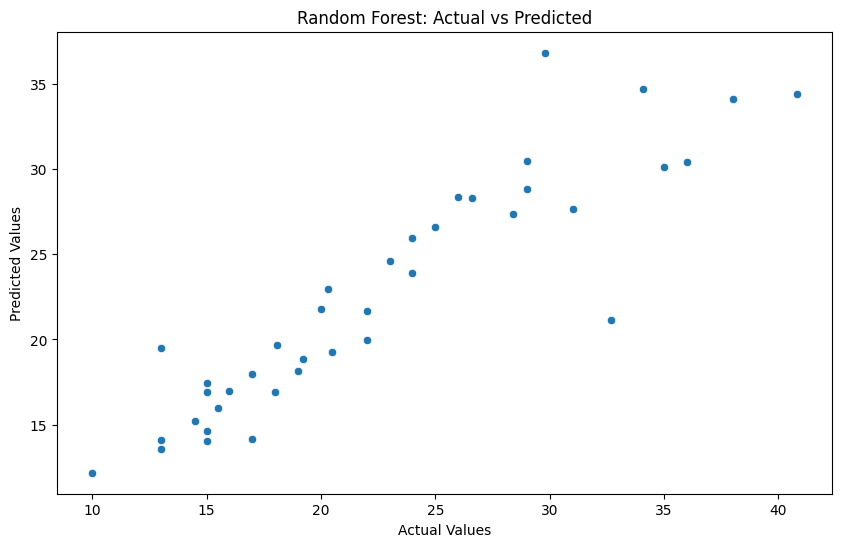

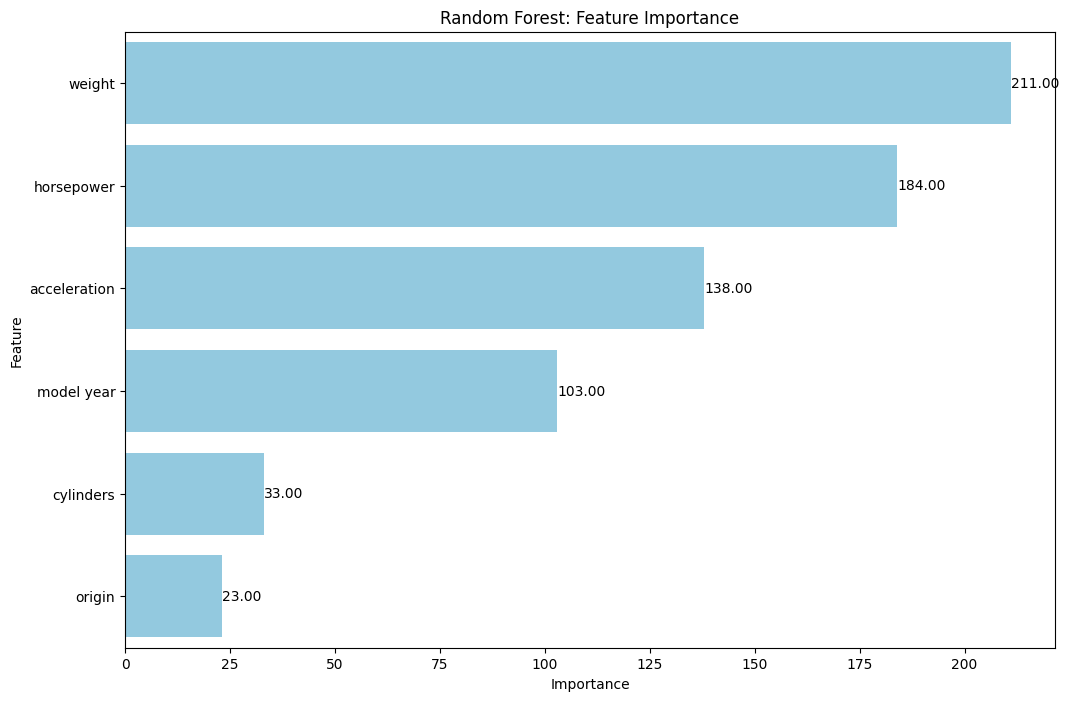

In [ ]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x=Y_val, y=y_val_pred)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

plt.figure(figsize=(12, 8))
barplot = sb.barplot(x='Importance', y='Feature', data=feature_importance_df, color='skyblue')
plt.title('Random Forest: Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

for p in barplot.patches:
    width = p.get_width()
    plt.text(width,
             p.get_y() + p.get_height() / 2,
             '{:1.2f}'.format(width),
             ha = 'left',
             va = 'center')

plt.show()

In [ ]:
import xgboost as xgb
from xgboost import plot_importance

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=10)
xg_reg.fit(X_train, Y_train)
Y_pred_val = xg_reg.predict(X_val)

mse_xgboost = mean_squared_error(Y_val, Y_pred_val)
print('Mean squared error on validation set: %.2f' % mse_xgboost)

mape_xgboost = np.mean(np.abs((Y_val - Y_pred_val) / Y_val)) * 100
print('Mean absolute percentge error: %.2f' % mape_xgboost)


Mean squared error on validation set: 25.84
Mean absolute percentge error: 21.87


In [ ]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=Y_train)
dval = xgb.DMatrix(X_val, label=Y_val)
params = {
    'max_depth': 6,
    'min_child_weight': 1,
    'eta': 0.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective': 'reg:squarederror',
}
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
model = xgb.train(
    params,
    dtrain,
    num_boost_round=999,
    evals=[(dval, "Validation")],
    early_stopping_rounds=10
)
dtest = xgb.DMatrix(X_test)
Y_pred = model.predict(dtest)
Y_val_pred = model.predict(dval)
mape_score = mean_absolute_percentage_error(Y_val, Y_val_pred)
print("MAPE Score: {:.2f}".format(mape_score))
Y_pred = model.predict(dtest)

[0]	Validation-rmse:6.19616
[1]	Validation-rmse:4.98769
[2]	Validation-rmse:4.21345
[3]	Validation-rmse:3.72738
[4]	Validation-rmse:3.51806
[5]	Validation-rmse:3.46767
[6]	Validation-rmse:3.36481
[7]	Validation-rmse:3.32479
[8]	Validation-rmse:3.31349
[9]	Validation-rmse:3.36354
[10]	Validation-rmse:3.38500
[11]	Validation-rmse:3.38284
[12]	Validation-rmse:3.40073
[13]	Validation-rmse:3.40583
[14]	Validation-rmse:3.36839
[15]	Validation-rmse:3.38804
[16]	Validation-rmse:3.39974
[17]	Validation-rmse:3.41066
[18]	Validation-rmse:3.34245
MAPE Score: 9.51


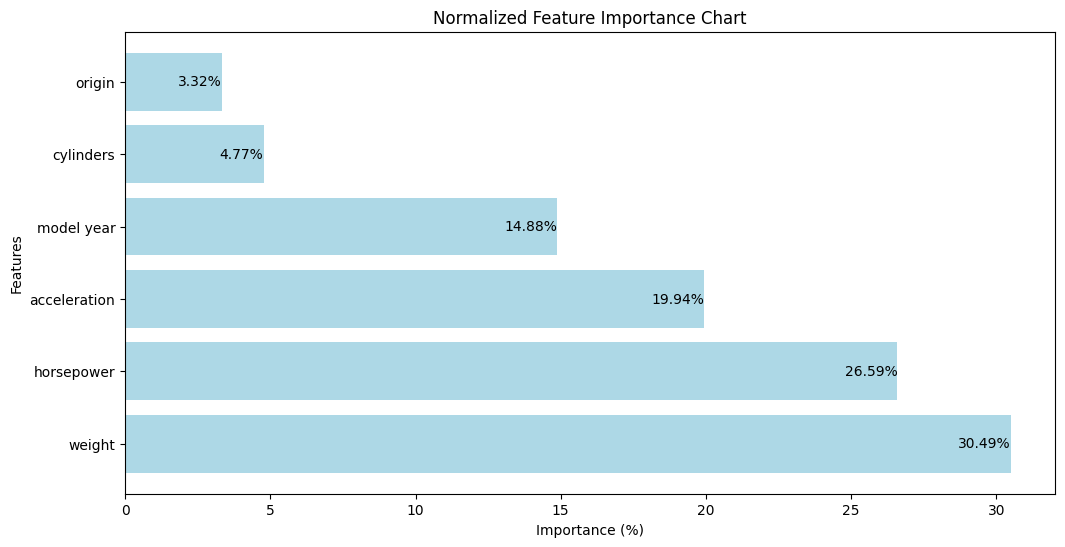

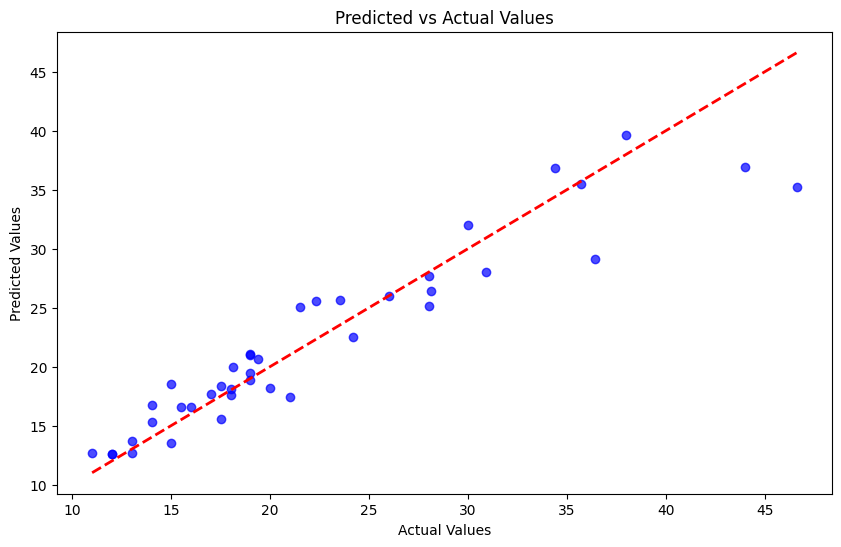

In [ ]:
feature_importance = model.get_score(importance_type='weight')
total_importance = sum(feature_importance.values())

normalized_importance = {key: (value / total_importance) * 100 for key, value in feature_importance.items()}
normalized_importance = {key: value for key, value in sorted(normalized_importance.items(), key=lambda item: item[1], reverse=True)}

feature_importance_df = pd.DataFrame(list(normalized_importance.items()), columns=['Feature', 'Importance'])

plt.figure(figsize=(12, 6))
bars = plt.barh(range(len(feature_importance_df)), feature_importance_df['Importance'], color='lightblue')
plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'])
plt.xlabel('Importance (%)')
plt.ylabel('Features')
plt.title('Normalized Feature Importance Chart')

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', ha='right', va='center', color='black')
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], linestyle='--', color='red', linewidth=2)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'n_estimators': [50, 100, 200, 300],
}

xg_reg = xgb.XGBRegressor(objective='reg:squarederror')
random_search = RandomizedSearchCV(xg_reg, param_distributions=param_grid, n_iter=50, scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1)
random_search.fit(features_scaled, target)
best_xg_reg = random_search.best_estimator_
kf = KFold(n_splits=5, shuffle=True, random_state=42)
xg_mape_cv = cross_val_score(best_xg_reg, features_scaled, target, cv=kf, scoring=make_scorer(mape_scorer))
print("Mean Absolute Percentage Error (MAPE) from Cross-Validation (XGBoost):", np.mean(xg_mape_cv))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mean Absolute Percentage Error (MAPE) from Cross-Validation (XGBoost): 8.712136400422544


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dropout
from keras import regularizers

In [ ]:
features = df.drop(['mpg', 'car name'], axis=1)
target = df['mpg'].values
print("X_train.shape => ", X_train.shape)
print("X_val.shape =>", X_val.shape)

X_train.shape =>  (313, 6)
X_val.shape => (79, 6)


In [ ]:
features = df.drop(['mpg', 'car name'], axis=1)
target = df['mpg'].values
X_train, X_val, \
	Y_train, Y_val = train_test_split(features, target,
									test_size=0.2,
									random_state=22)
X_train.shape, X_val.shape

((313, 6), (79, 6))

In [ ]:
AUTO = tf.data.experimental.AUTOTUNE
train_ds = (
	tf.data.Dataset
	.from_tensor_slices((X_train, Y_train))
	.batch(32)
	.prefetch(AUTO)
)
val_ds = (
	tf.data.Dataset
	.from_tensor_slices((X_val, Y_val))
	.batch(32)
	.prefetch(AUTO)
)

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[6]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[6]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[6]),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='tanh', input_shape=[6]),
    layers.Dense(128, activation='tanh'),
    layers.Dense(1)
])

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[6]),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1)
])

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[6]),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1)
])

In [ ]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[6]),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1)
])

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[6]),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1)
])

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[6]),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1)
])

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[6]),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1)
])

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[6],kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dense(1)
])

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[6]),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[6]),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(1)
])

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[6]),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.Dense(1, activation='linear')
])

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[6]),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.Dense(1, activation='linear')
])

In [ ]:
model.compile(
	loss='mae',
	optimizer='adam',
	metrics=['mape']
)


In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               896       
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50561 (197.50 KB)
Trainable params: 50561 (197.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(train_ds,
					epochs=100,
					validation_data=val_ds)


Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 99.0096 - mape: 520.5365 - val_loss: 68.1781 - val_mape: 351.2209
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 41.4723 - mape: 214.7251 - val_loss: 23.4739 - val_mape: 106.7632
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 15.3993 - mape: 72.9842 - val_loss: 19.3433 - val_mape: 117.5918
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 12.9450 - mape: 63.5161 - val_loss: 10.1691 - val_mape: 46.8553
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 11.4047 - mape: 50.0043 - val_loss: 11.2059 - val_mape: 58.3583
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 10.9910 - mape: 50.2619 - val_loss: 14.1789 - val_mape: 82.6488
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 11.2170 - mape: 52.2673 - val_loss: 10.1797 - val_mape: 50.6515
Epoch 8/100
10/10 [================

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.head()


,loss,mape,val_loss,val_mape
0,99.009575,520.536499,68.178101,351.220947
1,41.472336,214.725113,23.473902,106.763176
2,15.399328,72.984200,19.343283,117.591843
3,12.944969,63.516136,10.169050,46.855259
4,11.404718,50.004307,11.205918,58.358326


In [ ]:
mape_nn = history_df['mape'].iloc[-1]
print('Mean absolute percentage error on neural network: %.2f' % mape_nn)

Mean absolute percentage error on neural network: 11.63


In [ ]:
def build_model(hp):
    model = Sequential([
        layers.Dense(64, activation='relu', input_shape=[6]),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
        layers.Dense(1, activation='linear')
    ])

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.8 MB/s eta 0:00:00


In [ ]:
from kerastuner import RandomSearch

def build_model(hp):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[6]),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(hp.Choice('l2_value1', values=[0.01, 0.005, 0.001]))),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(hp.Choice('l2_value2', values=[0.01, 0.005, 0.001]))),
        layers.Dense(1, activation='linear')
    ])
    model.compile(loss='mae', optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), metrics=['mape'])
    return model


In [ ]:
tuner = RandomSearch(build_model, objective='val_mape', max_trials=100, executions_per_trial=2, directory='auto_mpg_dir', project_name='Auto_MPG')

tuner.search_space_summary()

tuner.search(train_ds, epochs=100, validation_data=val_ds)

tuner.results_summary()


Trial 27 Complete [00h 00m 25s]
val_mape: 10.246764183044434

Best val_mape So Far: 9.257826328277588
Total elapsed time: 00h 11m 11s
Results summary
Results in auto_mpg_dir/Auto_MPG
Showing 10 best trials
Objective(name="val_mape", direction="min")

Trial 019 summary
Hyperparameters:
l2_value1: 0.001
l2_value2: 0.01
learning_rate: 0.01
Score: 9.257826328277588

Trial 008 summary
Hyperparameters:
l2_value1: 0.005
l2_value2: 0.001
learning_rate: 0.001
Score: 9.313340663909912

Trial 007 summary
Hyperparameters:
l2_value1: 0.01
l2_value2: 0.01
learning_rate: 0.01
Score: 9.762818336486816

Trial 013 summary
Hyperparameters:
l2_value1: 0.001
l2_value2: 0.005
learning_rate: 0.01
Score: 9.869976997375488

Trial 024 summary
Hyperparameters:
l2_value1: 0.001
l2_value2: 0.01
learning_rate: 0.001
Score: 9.875309467315674

Trial 012 summary
Hyperparameters:
l2_value1: 0.001
l2_value2: 0.001
learning_rate: 0.01
Score: 9.927552223205566

Trial 001 summary
Hyperparameters:
l2_value1: 0.01
l2_value2:

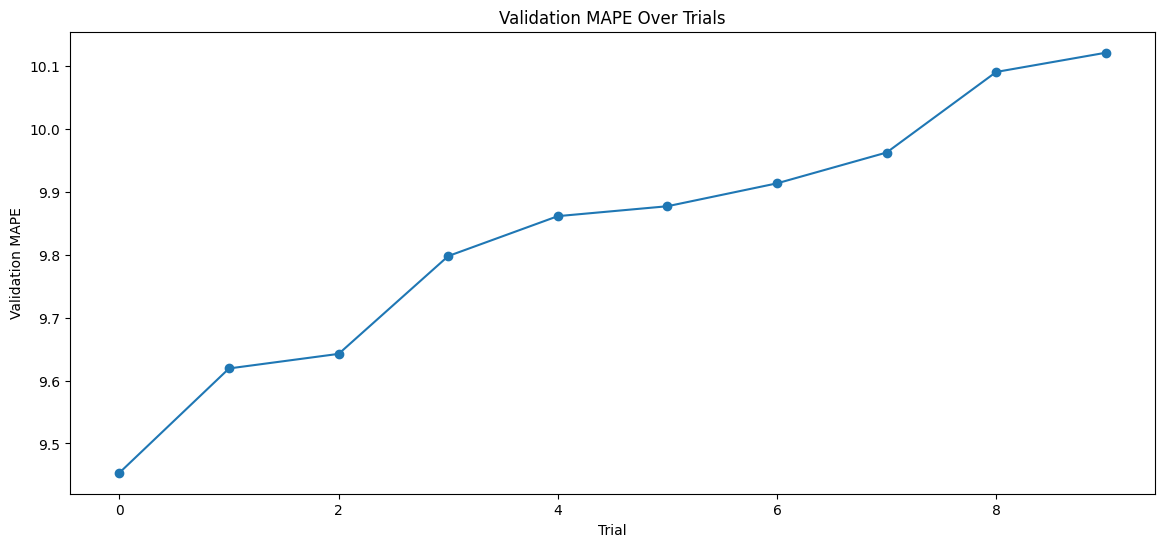

In [ ]:
best_trials = tuner.oracle.get_best_trials(num_trials=10)

val_mapes = [trial.metrics.get_best_value('val_mape') for trial in best_trials]

df = pd.DataFrame(val_mapes, columns=['val_mape'])

plt.figure(figsize=(14, 6))
plt.plot(df['val_mape'], '-o')
plt.title('Validation MAPE Over Trials')
plt.xlabel('Trial')
plt.ylabel('Validation MAPE')
plt.show()

In [ ]:
history_df.loc[:, ['mape', 'val_mape']].plot()
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.title('Training and Validation MAPE Over Epochs')
plt.show()

In [ ]:
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]

best_score = best_trial.metrics.get_best_value('val_mape')

print('Best score: ', best_score)


Best score:  9.257826328277588


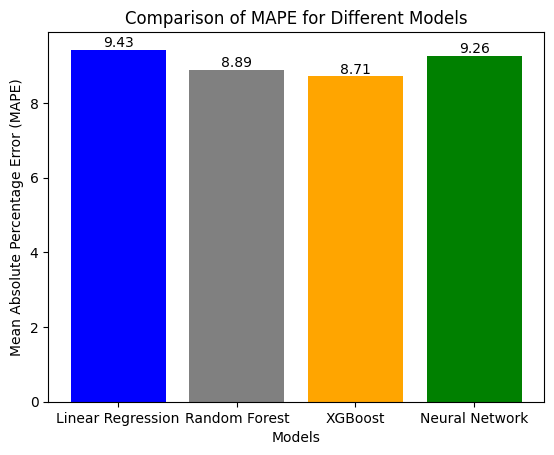

In [ ]:
models = ['Linear Regression', 'Random Forest','XGBoost', 'Neural Network']
mape_values = [np.mean(lr_mape_cv),mape_val,np.mean(xg_mape_cv),best_score ]
plt.bar(models, mape_values, color=['blue', 'grey','orange', 'green'])
for i, value in enumerate(mape_values):
    plt.text(i, value + 0.001, f'{value:.2f}', ha='center', va='bottom')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.title('Comparison of MAPE for Different Models')
plt.show()